Spam SMS Classification using Natural Language Processing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the required dataset
nlp_data = pd.read_csv('/content/NLP_dataset.csv',encoding='unicode_escape')

In [3]:
nlp_data.head()

,index,type,message info
0,1,ham,"Go until jurong point, crazy.. Available only ..."
1,2,ham,Ok lar... Joking wif u oni...
2,3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,ham,U dun say so early hor... U c already then say...
4,5,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA - Exploratory Data Analysis

In [4]:
nlp_data.shape

(5572, 3)

In [5]:
nlp_data.columns

Index(['index', 'type', 'message info'], dtype='object')

In [6]:
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         5572 non-null   int64 
 1   type          5572 non-null   object
 2   message info  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [7]:
nlp_data.describe(include='object')

,type,message info
count,5572,5572
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
nlp_data['type'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
# Replacing the type value within class 0 and 1
nlp_data['type'] = nlp_data['type'].map({'ham':0,'spam':1})

In [10]:
nlp_data.head()

,index,type,message info
0,1,0,"Go until jurong point, crazy.. Available only ..."
1,2,0,Ok lar... Joking wif u oni...
2,3,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,4,0,U dun say so early hor... U c already then say...
4,5,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Import required libraries for data visulalization
import matplotlib.pyplot as plt
import seaborn as sns

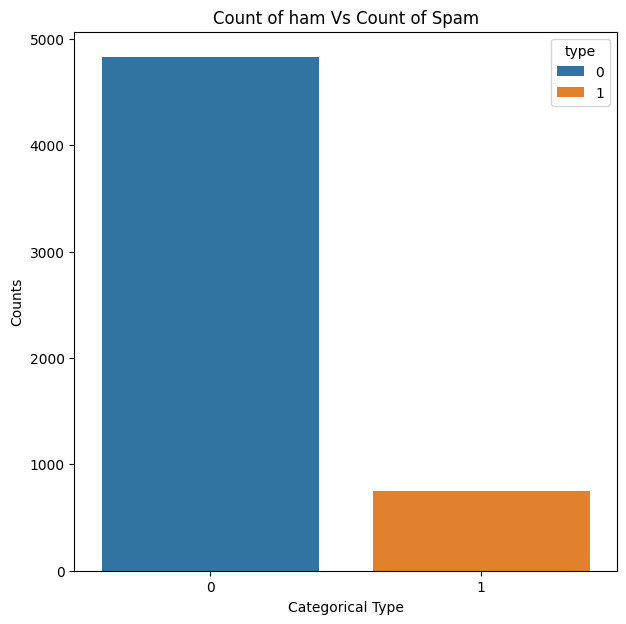

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(x='type',data=nlp_data,hue='type')
plt.title('Count of ham Vs Count of Spam')
plt.xlabel('Categorical Type')
plt.ylabel('Counts')
plt.show()

In [13]:
# Total counts of Ham and Spam types
only_spam = nlp_data[nlp_data['type']==1]
print('Number of Spam messages are: {}'.format(only_spam.shape[0]))
print('Number of Ham(Normal) messages are: {}'.format(nlp_data.shape[0]-only_spam.shape[0]))

Number of Spam messages are: 747
Number of Ham(Normal) messages are: 4825


Feature Extraction
1. There is a huge imbalance between Ham Vs Spam Message, So inorder to overcome it, we have to use Oversampling.
2. Creating new features such as word counts, message containing currency symbols and message containing numbers.

In [14]:
counts = int((nlp_data.shape[0]-only_spam.shape[0])/only_spam.shape[0])
counts

6

In [15]:
for i in range(0, counts-1):
  nlp_data = pd.concat([nlp_data,only_spam])
nlp_data.shape

(9307, 3)

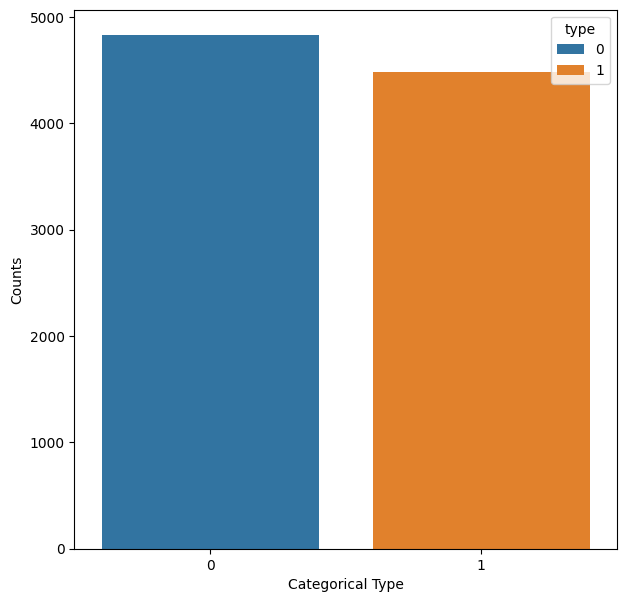

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x='type',data=nlp_data, hue='type')
plt.xlabel('Categorical Type')
plt.ylabel('Counts')
plt.show()

In [17]:
only_spam = nlp_data[nlp_data['type']==1]
print('Number of Spam messages are: {}'.format(only_spam.shape[0]))
print('Number of Ham(Normal) messages are: {}'.format(nlp_data.shape[0]-only_spam.shape[0]))

Number of Spam messages are: 4482
Number of Ham(Normal) messages are: 4825


In [18]:
# Creating feature for word counts
nlp_data['words'] = nlp_data['message info'].apply(lambda x: len(x.split()))

In [19]:
nlp_data.head()

,index,type,message info,words
0,1,0,"Go until jurong point, crazy.. Available only ...",20
1,2,0,Ok lar... Joking wif u oni...,6
2,3,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,4,0,U dun say so early hor... U c already then say...,11
4,5,0,"Nah I don't think he goes to usf, he lives aro...",13


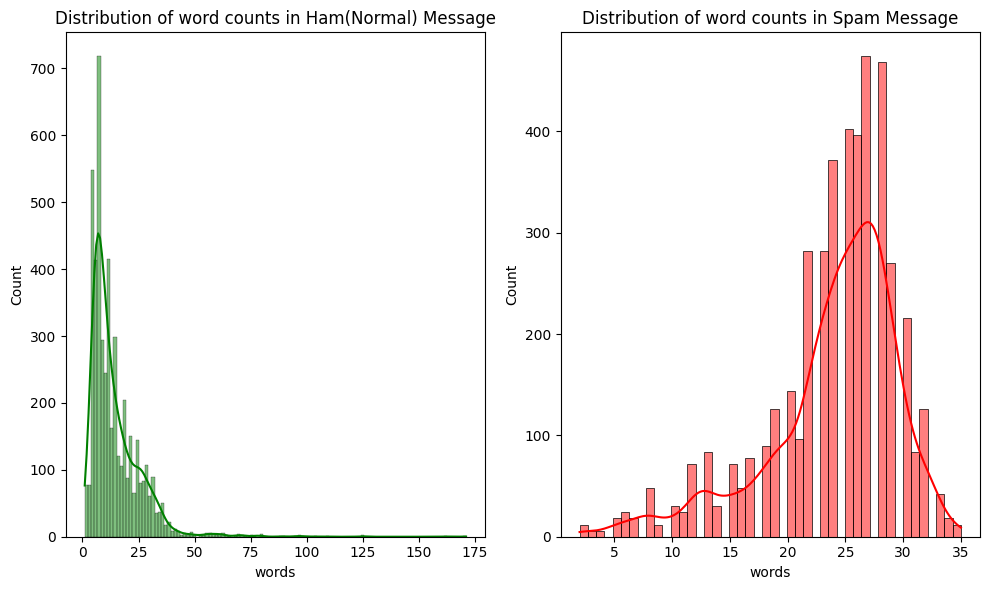

In [20]:
# Create 2 distribution plots to find the range of counts between Ham and Spam message
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
# 1-row, 2-columns , 1st dist plot for Ham messages
a=nlp_data[nlp_data['type']==0].words
sns.histplot(x=a,kde=True,color='green')
plt.title('Distribution of word counts in Ham(Normal) Message')

plt.subplot(1,2,2)
# 1-row, 2-columns , 2st dist plot for Spam messages
a=nlp_data[nlp_data['type']==1].words
sns.histplot(x=a,kde=True,color='red')
plt.title('Distribution of word counts in Spam Message')
plt.tight_layout()
plt.show()

From the Above plot Ham(Normal) message words counts are less than 20 whereas Spam message word counts range between 15 to 30.

In [21]:
# Creating new feature for words containing currency symbols
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0
nlp_data['currency symbol'] = nlp_data['message info'].apply(currency)

In [22]:
nlp_data.tail()

,index,type,message info,words,currency symbol
5537,5538,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,5541,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,5548,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,5567,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,5568,1,This is the 2nd time we have tried 2 contact u...,30,1


In [23]:
nlp_data['currency symbol'].value_counts()

currency symbol
0    7746
1    1561
Name: count, dtype: int64

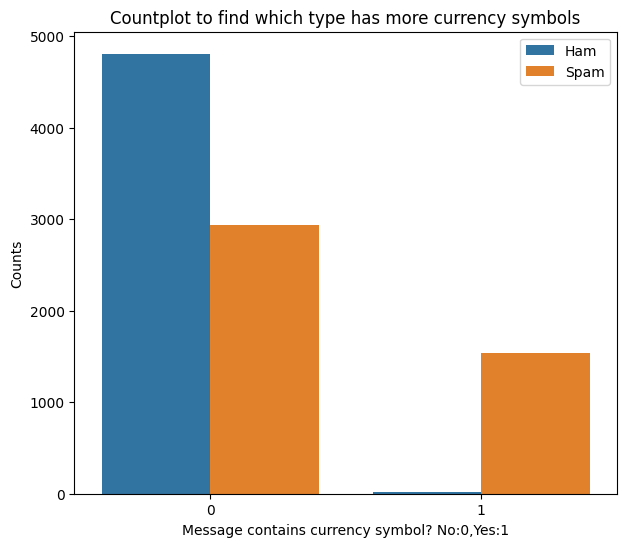

In [24]:
# Countplot to visualize which type of message has more currency symbols
plt.figure(figsize=(7,6))
sns.countplot(x='currency symbol',data=nlp_data,hue='type')
plt.title('Countplot to find which type has more currency symbols')
plt.xlabel('Message contains currency symbol? No:0,Yes:1')
plt.ylabel('Counts')
plt.legend(labels=['Ham','Spam'])
plt.show()

Comparing to Ham(Normal) messages, Spam messages containing more currency symbols

In [25]:
# Creating new feature for words containing numbers
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

nlp_data['contain numbers'] = nlp_data['message info'].apply(numbers)

In [26]:
nlp_data.head()

,index,type,message info,words,currency symbol,contain numbers
0,1,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,2,0,Ok lar... Joking wif u oni...,6,0,0
2,3,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,4,0,U dun say so early hor... U c already then say...,11,0,0
4,5,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


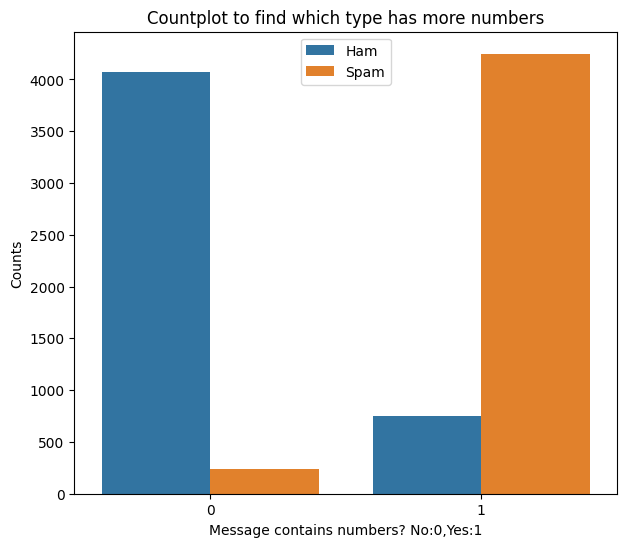

In [27]:
# Countplot to visualize which type of message has more numbers
plt.figure(figsize=(7,6))
sns.countplot(x='contain numbers',data=nlp_data,hue='type')
plt.title('Countplot to find which type has more numbers')
plt.xlabel('Message contains numbers? No:0,Yes:1')
plt.ylabel('Counts')
plt.legend(labels=['Ham','Spam'])
plt.show()

Comparing to Ham(Normal) message, Spam message has the majority of message containing numbers.

Data Cleaning
1. Removing special characters and numbers using Regular Expressions
2. Converting the entire messages into lower case
3. Tokenizing the sms by words
4. Removing the stop words
5. Lemmatizing the words
6. Joining the lemmatized words
7. Building a corpus of messages

In [28]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(nlp_data['message info']):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [30]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [31]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors)
Y = nlp_data['type']

Model Building
Metrics: F1-Score
Algorithms to be used
1. Mulitinomial Naive Bayes
2. Decision Tree
3. Random Forest

From the above, the model that attains maximum score will be used for prediction

In [32]:
# Importing required package

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
# Splitting the data for training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# Fitting Multinomial Naive Bayes for the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, Y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 4)))
print('Standard Deviation: {}'.format(round(cv.std(), 4)))

--- Average F1-Score for MNB model: 0.9426 ---
Standard Deviation: 0.0042


In [38]:
# Classification report for Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(Y_test, Y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



Text(0.5, 1.0, '--- Confusion Matrix for Multinomial Naive Bayes model ---')

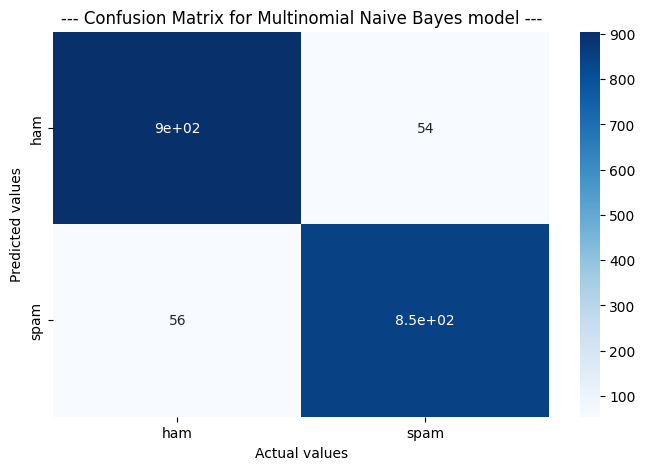

In [43]:
# Confusion matrix of Multinomial Naive Bayes model
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
sns.heatmap(data=cm, annot=True, cmap="Blues",xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [45]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, Y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 4)))
print('Standard Deviation: {}'.format(round(cv.std(), 4)))

--- Average F1-Score for Decision Tree model: 0.979 ---
Standard Deviation: 0.0041


In [46]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(Y_test, Y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



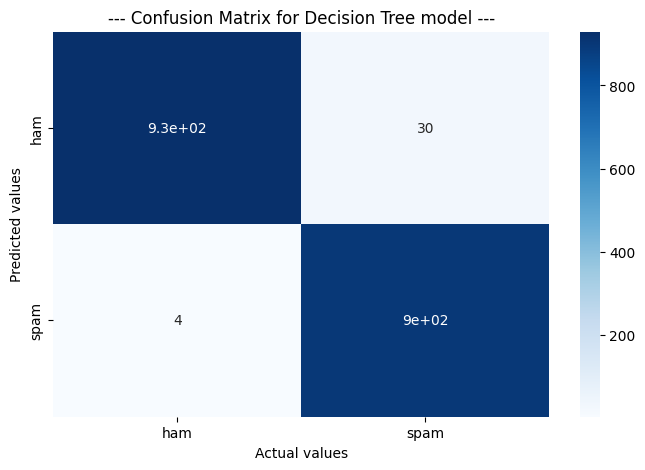

In [47]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [49]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, Y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 4)))
print('Standard Deviation: {}'.format(round(cv.std(), 4)))

--- Average F1-Score for Random Forest model: 0.9949 ---
Standard Deviation: 0.0029


In [50]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(Y_test, Y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       959
           1       0.99      1.00      1.00       903

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



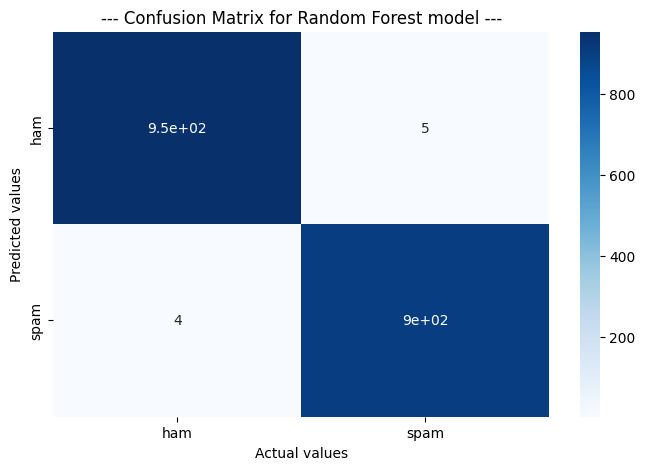

In [51]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

So from the above models Random Forest model is selected for predicting the result

Model Predictions

In [52]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [53]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Do not care its a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Do not care its a SPAM message.


In [54]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [55]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.
